# t-sne 觀察 : 流形還原


## [教學目標]
- 觀察雙同心圓使用 t-SNE 在不同困惑度 (perplexity) 下的分群效果  
- 因為非監督模型的效果, 較難以簡單的範例看出來  
  所以非監督偶數日提供的範例與作業, 主要目的在於觀察非監督模型的效果,  
  同學只要能感受到模型效果即可, 不用執著於搞懂程式的每一個部分
- https://scikit-learn.org/stable/auto_examples/manifold/plot_t_sne_perplexity.html

# [作業目標]
- 試著模仿範例寫法, 觀察 S 形使用 t-SNE , 在不同困惑度 (perplexity) 下的流形還原效果

# [作業重點]
- 使用 S 形資料集, 觀察 t-sne 在困惑度 (perplexity) 有所不同時, 流形還原的效果如何變化 (In[4], Out[4])
- Hint : ax.scatter(Y[red, 0], Y[red, 1], c="r") 與 ax.scatter(Y[green, 0], Y[green, 1], c="g") 兩行改一行 ax.scatter(Y[:, 0], Y[:, 1], c=color)

circles, perplexity=5 in 0.77 sec
circles, perplexity=30 in 1 sec
circles, perplexity=50 in 0.99 sec
circles, perplexity=100 in 1.1 sec
S-curve, perplexity=5 in 0.79 sec
S-curve, perplexity=30 in 0.98 sec
S-curve, perplexity=50 in 1.2 sec
S-curve, perplexity=100 in 1.6 sec
uniform grid, perplexity=5 in 0.78 sec
uniform grid, perplexity=30 in 0.93 sec
uniform grid, perplexity=50 in 0.96 sec
uniform grid, perplexity=100 in 1.4 sec


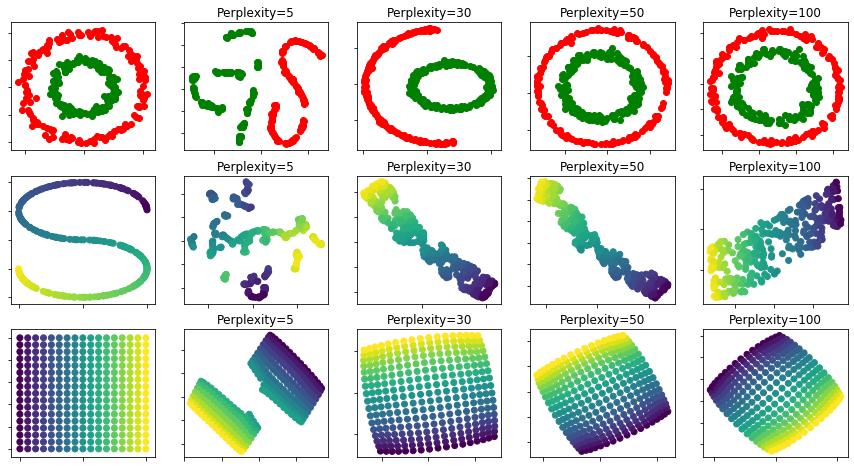

In [8]:
n_samples = 300
n_components = 2
(fig, subplots) = plt.subplots(3, 5, figsize=(15, 8))
perplexities = [5, 30, 50, 100]

X, y = datasets.make_circles(n_samples=n_samples, factor=.5, noise=.05)

red = y == 0
green = y == 1

ax = subplots[0][0]
ax.scatter(X[red, 0], X[red, 1], c="r")
ax.scatter(X[green, 0], X[green, 1], c="g")
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')

for i, perplexity in enumerate(perplexities):
    ax = subplots[0][i + 1]

    t0 = time()
    tsne = manifold.TSNE(n_components=n_components, init='random',
                         random_state=0, perplexity=perplexity)
    Y = tsne.fit_transform(X)
    t1 = time()
    print("circles, perplexity=%d in %.2g sec" % (perplexity, t1 - t0))
    ax.set_title("Perplexity=%d" % perplexity)
    ax.scatter(Y[red, 0], Y[red, 1], c="r")
    ax.scatter(Y[green, 0], Y[green, 1], c="g")
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    ax.axis('tight')

# Another example using s-curve
X, color = datasets.samples_generator.make_s_curve(n_samples, random_state=0)

ax = subplots[1][0]
ax.scatter(X[:, 0], X[:, 2], c=color)
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())

for i, perplexity in enumerate(perplexities):
    ax = subplots[1][i + 1]

    t0 = time()
    tsne = manifold.TSNE(n_components=n_components, init='random',
                         random_state=0, perplexity=perplexity)
    Y = tsne.fit_transform(X)
    t1 = time()
    print("S-curve, perplexity=%d in %.2g sec" % (perplexity, t1 - t0))

    ax.set_title("Perplexity=%d" % perplexity)
    ax.scatter(Y[:, 0], Y[:, 1], c=color)
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    ax.axis('tight')


# Another example using a 2D uniform grid
x = np.linspace(0, 1, int(np.sqrt(n_samples)))
xx, yy = np.meshgrid(x, x)
X = np.hstack([
    xx.ravel().reshape(-1, 1),
    yy.ravel().reshape(-1, 1),
])
color = xx.ravel()
ax = subplots[2][0]
ax.scatter(X[:, 0], X[:, 1], c=color)
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())

for i, perplexity in enumerate(perplexities):
    ax = subplots[2][i + 1]

    t0 = time()
    tsne = manifold.TSNE(n_components=n_components, init='random',
                         random_state=0, perplexity=perplexity)
    Y = tsne.fit_transform(X)
    t1 = time()
    print("uniform grid, perplexity=%d in %.2g sec" % (perplexity, t1 - t0))

    ax.set_title("Perplexity=%d" % perplexity)
    ax.scatter(Y[:, 0], Y[:, 1], c=color)
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    ax.axis('tight')


plt.show()

>As shown below, t-SNE for higher perplexities finds meaningful topology of two concentric circles, however the size and the distance of the circles varies slightly from the original. Contrary to the two circles dataset, the shapes visually diverge from S-curve topology on the S-curve dataset even for larger perplexity values.

這兒還有更多超參數的討論 https://distill.pub/2016/misread-tsne/